#### PROJECT GOAL: THE GOAL OF THE PROJECT IS TO TEST THE DEGREE OF EFFECTIVENESS OF SELECTED MACHINE LEARNING MODELS/ALGORITHMS TO PREDICT THE VALUE OF TIME SERIES DATA BASED ON THE GOOGLE/ALPHABET STOCK

#### I CHOSE THIS COMPANY BECAUSE IT IS THE WORLD LARGEST TECH COMPANY AND I PERSONALLY OWN IT IN MY INVESTMENT PORTFOLIO

In [ ]:
pip install yfinance

In [398]:
import yfinance as yf

import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

from sklearn import linear_model
from sklearn import  metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

#### DATA IMPORT USING YFINANCE

In [399]:
data = yf.download('GOOGL', index_col = 0, squeeze = True, parse_dates=['Date'])

[*********************100%***********************]  1 of 1 completed


#### DATA PRINT

In [400]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2023-02-06,102.400002,104.360001,101.879997,102.900002,102.900002,31999600
2023-02-07,103.220001,108.180000,103.120003,107.639999,107.639999,49010200
2023-02-08,102.050003,103.139999,98.040001,99.370003,99.370003,94743500


#### CONCLUSION: COLUMNS IN IMPORTED DATA REPRESENT RESPECTIVELY: OPENING PRICE IN THE SESSION, MAXIMUM PRICE DURING THE SESSION, MINIMUM PRICE IN THE SESSION, CLOSING PRICE IN THE SESSION AND TRADING VOLUME, ROWS/INDEXES REPRESENT TRADING DAY

#### DATA DIMENSIONS PRINT

In [401]:
data.shape

(4653, 6)

#### CHECKING IF THERE ARE MISSING VALUES IN THE DATA

In [402]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### CONCLUSION: IMPORTED DATA IS CLEAN - NO MISSING VALUES PRESENT

#### FILTERING ANALYZED DATA - WE ARE INTERESTED IN THE CLOSING PRICE

In [403]:
data = data['Close']

#### PLOTTING CHART OF THE CLOSING PRICE OVER TIME

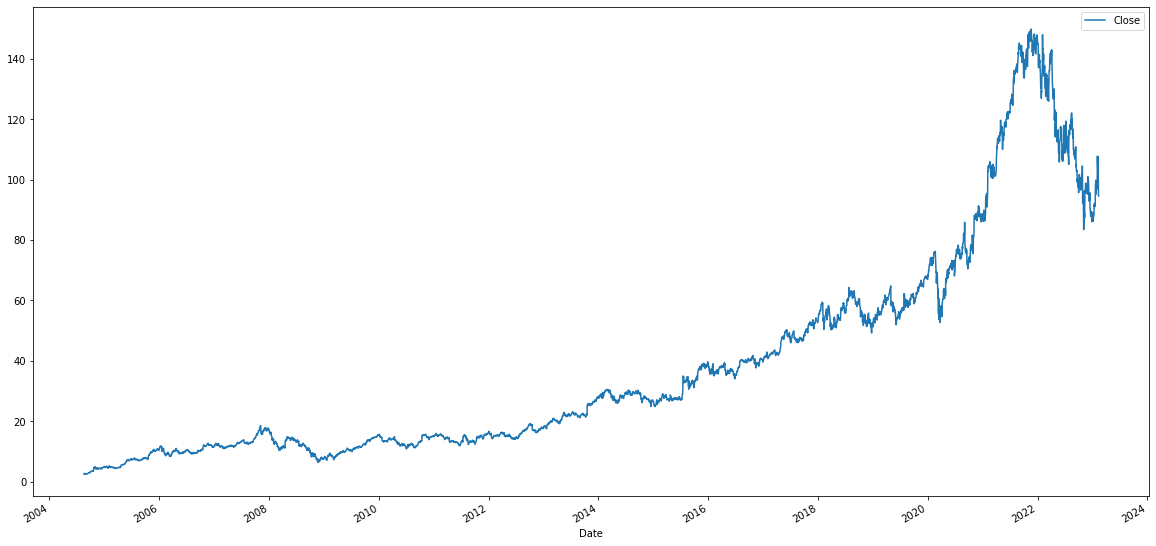

In [404]:
plt.figure(figsize=(20, 10))

data.plot()

plt.legend(loc='best')
plt.show()

#### DEFINING FUNCTION TEST_STATIONARITY TO CHECK STATIONARITY OF TIME-SERIES DATA

In [405]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()#.rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(20,10));
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#### TIME-SERIES DATA STATIONARITY CHECK

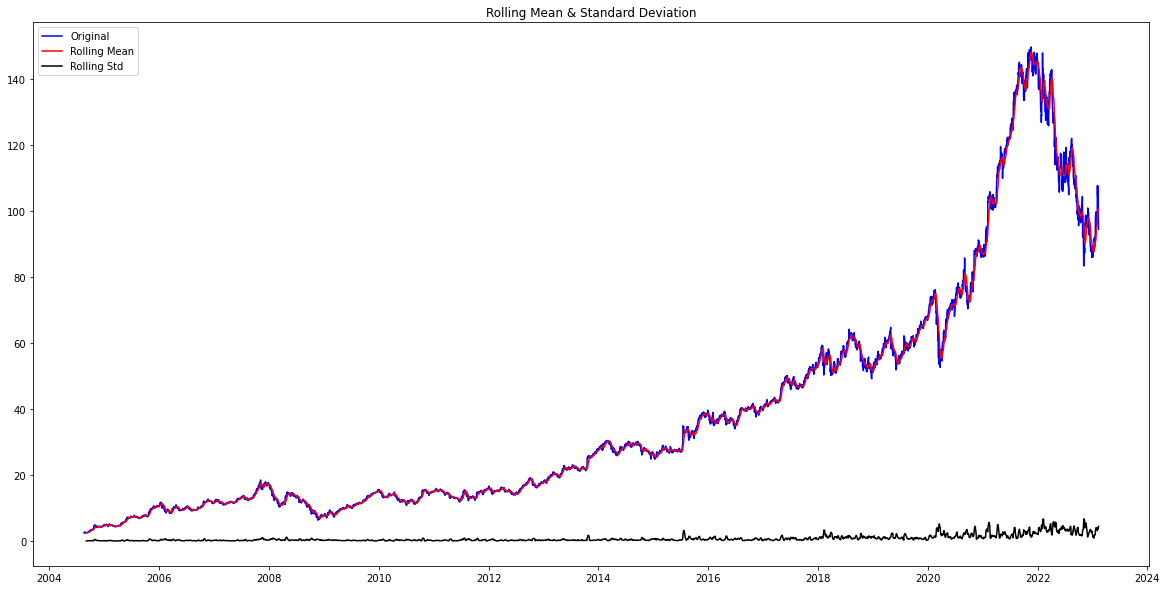

Results of Dickey-Fuller Test:
Test Statistic                   -0.135058
p-value                           0.945833
#Lags Used                       23.000000
Number of Observations Used    4629.000000
Critical Value (1%)              -3.431763
Critical Value (5%)              -2.862165
Critical Value (10%)             -2.567102
dtype: float64


In [406]:
test_stationarity(data)

#### P-VALUE CHECK

In [407]:
_,pval,_,_,_,_ =adfuller(data, autolag='AIC')
pval

0.9458327680504923

#### P-VALUE CHECK

In [408]:
if pval > 0.05:
    print('pval > 0.05 -> ZERO HYPOTHESIS TRUE -> TIME-SERIES DATA IS NOT STATIONARY')
else:
    print('pval < = 0.05 -> ZERO HYPOTHESIS FALSE -> TIME-SERIES DATA IS STATIONARY')

pval > 0.05 -> ZERO HYPOTHESIS TRUE -> TIME-SERIES DATA IS NOT STATIONARY


#### AUTO-CORRELATION CHECK

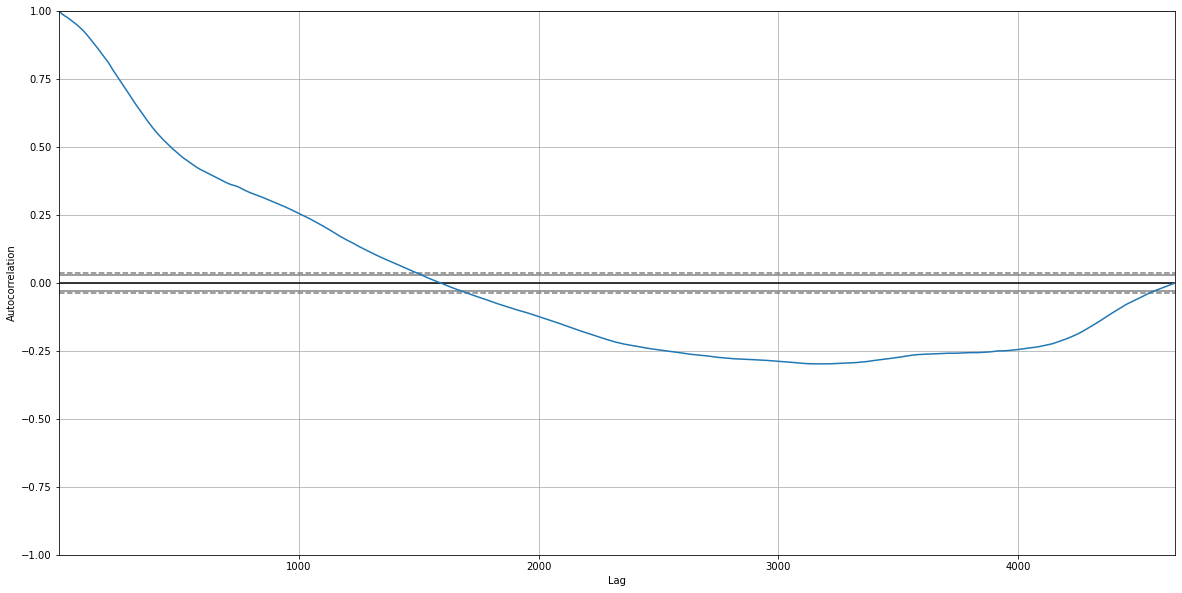

In [409]:
plt.figure(figsize=(20,10))

autocorrelation_plot(data)

plt.show()

#### AUTO-CORRELATION CHECK

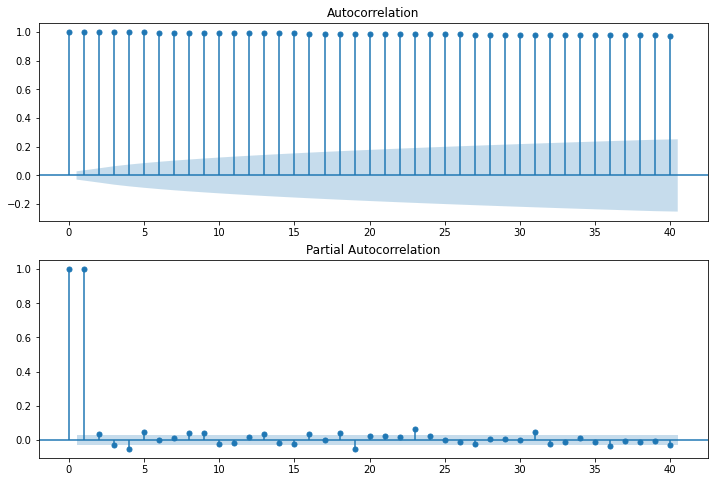

In [410]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.values, lags=40, ax=ax2)

plt.show()

#### DEFINING SIZE OF TEST DATA SECTION

In [411]:
test_size = 0.2

#### DATA TRANSFORMATION FOR LSTM NEURAL NETWORK PURPOSES

In [412]:
data_lstm = data.values.reshape(-1,1)

#### TRAIN-TEST DATA SPLIT

In [413]:
training_data_size = int(len(data_lstm)*(1-test_size))
test_data_size = len(data_lstm)-training_data_size

#### TRAIN-TEST DATA SPLIT

In [414]:
train_data = data_lstm[0:training_data_size,:]
test_data = data_lstm[training_data_size:len(data_lstm),:1]

#### TRANSFORMING DIVIDED DATA TO FEED LSTM NEURAL NETWORK

In [415]:
scaler = MinMaxScaler()

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

#### DEFINING THE TIME_STEP PARAMETER I.E. THE NUMBER OF PAST OBSERVATIONS BASED ON WHICH WE WILL TRY TO PREDICT THE NEXT OBSERVATION

In [416]:
time_step = 5

#### DEFINING CREATE_DATASET FUNCTION

In [417]:
def create_dataset(dataset, time_step=time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

X_train, y_train = create_dataset(train_data_scaled, time_step)
X_test, y_test = create_dataset(test_data_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#### DEFINING LSTM NEURAL NETWORK MODEL

In [418]:
model_lstm=Sequential()
model_lstm.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50,return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mse', 'mae'])

model_lstm.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
223/223 [==============================] - 10s 17ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0467 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0308
Epoch 2/30
223/223 [==============================] - 3s 11ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0221 - val_loss: 8.5991e-04 - val_mse: 8.5991e-04 - val_mae: 0.0222
Epoch 3/30
223/223 [==============================] - 3s 11ms/step - loss: 9.2568e-04 - mse: 9.2568e-04 - mae: 0.0207 - val_loss: 8.9240e-04 - val_mse: 8.9240e-04 - val_mae: 0.0226
Epoch 4/30
223/223 [==============================] - 2s 11ms/step - loss: 7.9791e-04 - mse: 7.9791e-04 - mae: 0.0191 - val_loss: 6.6182e-04 - val_mse: 6.6182e-04 - val_mae: 0.0206
Epoch 5/30
223/223 [==============================] - 3s 11ms/step - loss: 7.8268e-04 - mse: 7.8268e-04 - mae: 0.0188 - val_loss: 7.0223e-04 - val_mse: 7.0223e-04 - val_mae: 0.0216
Epoch 6/30
223/223 [==============================] - 3s 12ms/step - loss: 8.0937e-04 - mse: 8.0937e-04 - mae: 0.0201 

#### DATA PREDICTION WITH LSTM NEURAL NETWORK MODEL FOR TRAINING AND TEST DATA

In [419]:
train_predict = model_lstm.predict(X_train)
test_predict = model_lstm.predict(X_test)

29/29 [==============================] - 0s 5ms/step


#### TRANSFORMATION OF DATA FOR CORRECT PLOTTING

In [420]:
train_predict_inverted = scaler.inverse_transform(train_predict)
test_predict_inverted = scaler.inverse_transform(test_predict)

train_predict_inverted_zeros = np.zeros(time_step+1)
train_predict_inverted_final = np.insert(train_predict_inverted, 0, train_predict_inverted_zeros)

test_predict_inverted_zeros = np.zeros(train_predict_inverted_final.shape[0]+ time_step+1)
test_predict_inverted_final= np.insert(test_predict_inverted, 0, test_predict_inverted_zeros)

#### PLOTTING IMPORTED DATA AND PREDICTIONS USING LSTM NEURAL NETWORK MODEL FOR TRAINING AND TEST DATA SECTIONS

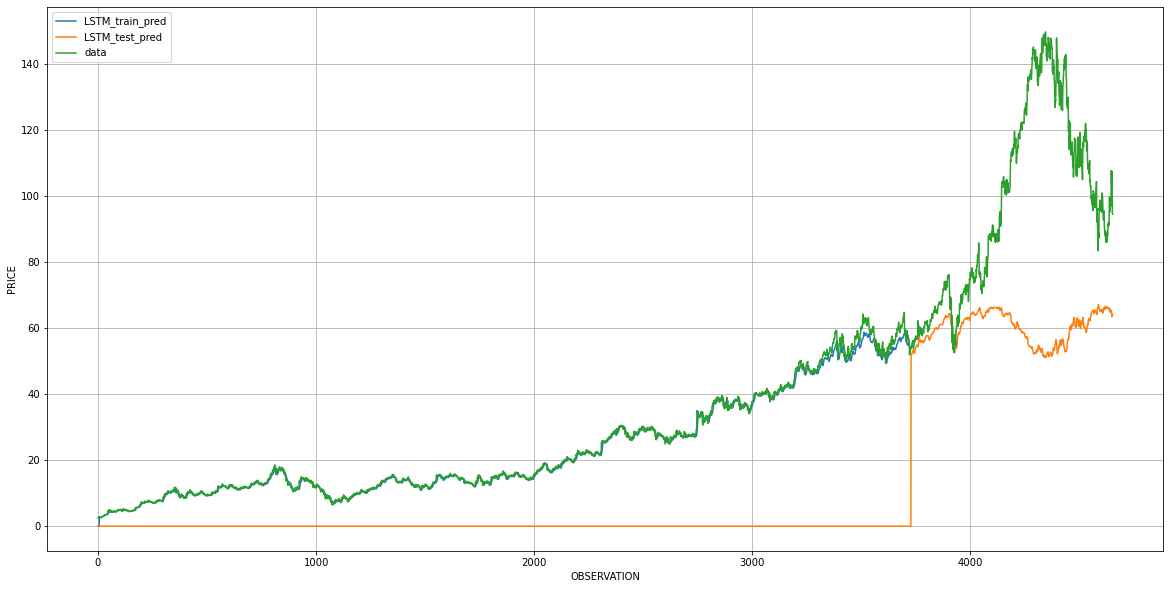

In [421]:
plt.figure(figsize=(20,10))

plt.plot(train_predict_inverted_final, label='LSTM_train_pred')
plt.plot(test_predict_inverted_final, label = 'LSTM_test_pred')
plt.plot(data.values, label= 'data')

plt.legend(loc='best')
plt.grid()
plt.xlabel('OBSERVATION')
plt.ylabel('PRICE')
plt.show()

#### CALCULATION OF QUALITY METRICS FOR PREDICTED VALUES FROM TEST DATA SECTION FOR LSTM NEURAL NETWORK MODEL

In [422]:
lstm_mean_squared_error = metrics.mean_squared_error(test_predict_inverted, data.values[-test_data_size+time_step+1:])

lstm_mean_absolute_error = metrics.mean_absolute_error(test_predict_inverted, data.values[-test_data_size+time_step+1:])

lstm_median_absolute_error = metrics.median_absolute_error(test_predict_inverted, data.values[-test_data_size+time_step+1:])

lstm_explained_variance_score = metrics.explained_variance_score(test_predict_inverted, data.values[-test_data_size+time_step+1:])

lstm_r2 = metrics.r2_score(test_predict_inverted, data.values[-test_data_size+time_step+1:])

#### CREATION AND ON-SCREEN PRINTING OF DATAFRAME WITH QUALITY METRICS FOR LSTM NEURAL NETWORK MODEL

In [423]:
d_1 = {'r2': [lstm_r2],
     'explained_variance_score': [lstm_explained_variance_score], 
     'median_absolute_error': [lstm_median_absolute_error],
     'mean_squared_error' : [lstm_mean_squared_error],
     'mean_absolute_error' : [lstm_mean_absolute_error],
    }

df_1 = pd.DataFrame(data=d_1)
df_1.insert(loc=0, column='Method', value=['LSTM'])

df_1

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,LSTM,-106.501784,-42.02775,30.643013,2333.403365,37.438945


#### DEFINING SERIES_TO_SUPERVISED FUNCTION

In [424]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

#### DEFINING RANGE FOR TRAIN-TEST DATA 

In [425]:
data_values = data.values

data_train = data[:-test_data_size]
data_test = data[-test_data_size:]

#### PLOTTING CHART OF TRAIN AND TEST DATA BEFORE THE TRANSFORMATION

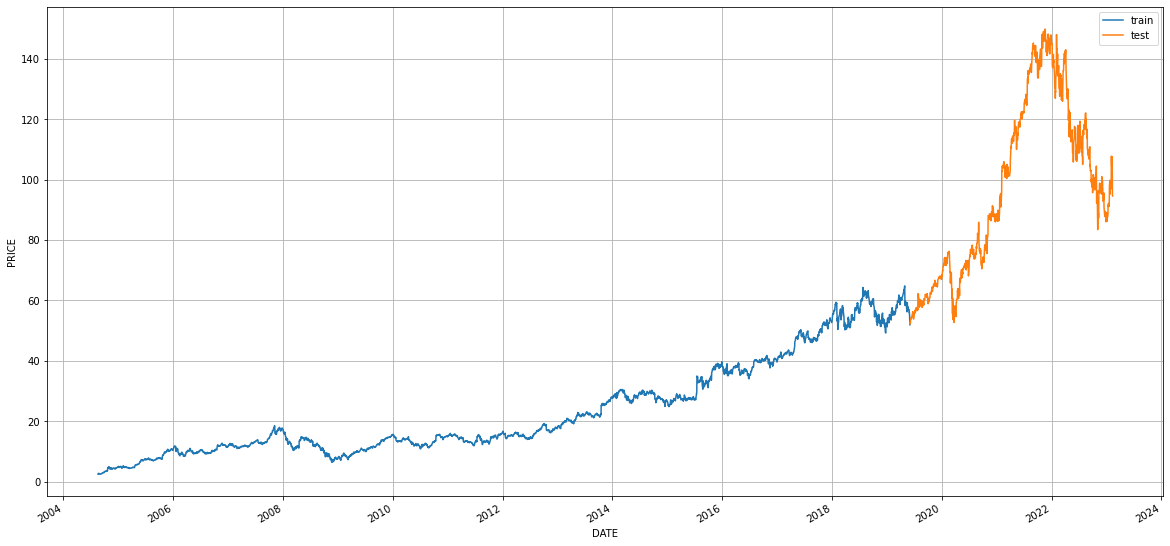

In [426]:
plt.figure(figsize=(20, 10))

data_train.plot(label = 'train')
data_test.plot(label = 'test')

plt.legend(loc='best')
plt.grid()
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.show()

#### TRANSFORMING AND PRINTING IMPORTED TIME-SERIES DATA USING PREVIOUSLY DEFINED FUNCTION SERIES_TO_SUPERVISED

In [427]:
df = pd.DataFrame()
df['t'] = [x for x in data]

dataframe = series_to_supervised(df, time_step, 1)

dataframe

,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
5,2.511011,2.710460,2.737738,2.624374,2.652653,2.700450
6,2.710460,2.737738,2.624374,2.652653,2.700450,2.656406
7,2.737738,2.624374,2.652653,2.700450,2.656406,2.552803
8,2.624374,2.652653,2.700450,2.656406,2.552803,2.561812
9,2.652653,2.700450,2.656406,2.552803,2.561812,2.508759
...,...,...,...,...,...,...
4648,96.940002,98.839996,100.430000,107.739998,104.779999,102.900002
4649,98.839996,100.430000,107.739998,104.779999,102.900002,107.639999
4650,100.430000,107.739998,104.779999,102.900002,107.639999,99.370003
4651,107.739998,104.779999,102.900002,107.639999,99.370003,95.010002


In [428]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

#### TRAIN-TEST DATA SPLIT

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

#### DEFINING CROSS-VALIDATION PARAMETERS TO AVOID OVER-FITTING

In [430]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=None)

#### SEARCHING FOR THE OPTIMAL DEGREE OF A POLYNOMIAL USING ELASTIC NET REGRESSION METHOD
#### ANALYZED DEGREES OF POLYNOMIAL: FROM 1 TO 4
#### ANALYZED ALPHA COEFFICIENT: 1, 2, 3
#### RETURN OPTIMAL DEGREE OF POLYNOMIAL

In [431]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, max_iter=1000, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [1, 2, 3]},
                    cv=kfold,
                    refit=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 572.9435187786416, tolerance: 362.63919991278294
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 574.0509922385418, tolerance: 349.57948071121973
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534.6982368104759, tolerance: 359.41756879296446
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Co

C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4975.622747115763, tolerance: 370.0658157792398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4893.576830300847, tolerance: 362.63919991278294
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4918.836349065255, tolerance: 349.57948071121973
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Con

C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6173.219707378198, tolerance: 359.41756879296446
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6234.485926582236, tolerance: 357.09986393469717
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6370.858757762906, tolerance: 370.0658157792398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Con

{'elasticnet__alpha': 1, 'polynomialfeatures__degree': 2}

#### SEARCHING FOR THE OPTIMAL DEGREE OF A POLYNOMIAL USING LASSO REGRESSION METHOD
#### ANALYZED DEGREES OF POLYNOMIAL: FROM 1 TO 4
#### ANALYZED ALPHA COEFFICIENT: 1, 2, 3
#### RETURN OPTIMAL DEGREE OF POLYNOMIAL

In [432]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, max_iter=1000, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [1, 2, 3]},
                    cv=kfold,
                    refit=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 648.4689443433003, tolerance: 362.63919991278294
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658.4159549434644, tolerance: 349.57948071121973
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613.376279298026, tolerance: 359.41756879296446
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Con

C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7037.558446426272, tolerance: 370.0658157792398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7391.958946057068, tolerance: 362.63919991278294
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7422.135084401488, tolerance: 349.57948071121973
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Con

C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9496.860258270808, tolerance: 359.41756879296446
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9561.441472983348, tolerance: 357.09986393469717
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9723.70110849222, tolerance: 370.0658157792398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conv

{'lasso__alpha': 1, 'polynomialfeatures__degree': 2}

#### SEARCHING FOR THE OPTIMAL DEGREE OF A POLYNOMIAL USING RIDGE REGRESSION METHOD
#### ANALYZED DEGREES OF POLYNOMIAL: FROM 1 TO 4
#### ANALYZED ALPHA COEFFICIENT: 1, 2, 3
#### RETURN OPTIMAL DEGREE OF POLYNOMIAL

In [433]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, max_iter=1000, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [1, 2, 3]},
                    cv=kfold,
                    refit=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.67485e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.87363e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.71457e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75195e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.56775e-17): result may 

{'polynomialfeatures__degree': 1, 'ridge__alpha': 3}

#### SEARCHING FOR THE OPTIMAL DEGREE OF A POLYNOMIAL USING POLYNOMIAL REGRESSION METHOD.
#### ANALYZING DEGREES OF POLYNOMIAL: FROM 1 TO 4
#### RETURN OPTIMAL DEGREE OF POLYNOMIAL

In [434]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'polynomialfeatures__degree': 1}

#### DEFINING AND TRAINING MLP REGRESSOR NEURAL NETWORK

In [327]:
grid_5 = GridSearchCV(MLPRegressor(hidden_layer_sizes=(100,100,100),activation='tanh',alpha=0.0001,max_iter=1000),
                    param_grid={'hidden_layer_sizes': [(1000,1000,1000),(100,100,100),(10,10,10)],
                                'alpha': [1, 10, 100 ,1000],
                               'activation': ['identity', 'logistic', 'tanh', 'relu']                               
                               },
                    cv = kfold,
                    n_jobs=1,
                    refit=True)

grid_5.fit(X_train,y_train)
grid_5.best_params_

C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\ne

C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Krzysiek\anaconda3\lib\site-packages\sklearn\ne

{'activation': 'identity', 'alpha': 1, 'hidden_layer_sizes': (100, 100, 100)}

#### CREATION LIST OF OPTIMAL R^2, VAR, MAE, MSE PARAMETERS FOR ALL ANALYZED METHODS

In [435]:
models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('MLP_R', grid_5.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []

for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

print('LSTM')
print("R^2: {}".format(lstm_r2))
print("Explained variance score: {}".format(lstm_explained_variance_score))
print("Median absolute error: {}".format(lstm_median_absolute_error))
print("Mean squared error: {}".format(lstm_mean_absolute_error))
print("Mean absolute errors: {}".format(lstm_mean_absolute_error))

ElasticNet
R^2: 0.9992169563314973
Explained variance score: 0.9992172014176993
Median absolute error: 0.30206710897162203
Mean squared error: 1.0537791462233554
Mean absolute errors: 0.568592017958142
Lasso
R^2: 0.9992126154376607
Explained variance score: 0.9992129515286612
Median absolute error: 0.3027244906220252
Mean squared error: 1.0596208937338056
Mean absolute errors: 0.5720336843663374
Ridge
R^2: 0.9993426775370718
Explained variance score: 0.9993433313553736
Median absolute error: 0.19742107818218102
Mean squared error: 0.8845901341651377
Mean absolute errors: 0.465351475399374
LR
R^2: 0.9993426365367757
Explained variance score: 0.9993432900270355
Median absolute error: 0.1975680864209517
Mean squared error: 0.8846453102156512
Mean absolute errors: 0.4653370864948065
MLP_R
R^2: 0.9993395970437583
Explained variance score: 0.999344176172417
Median absolute error: 0.19981214350173904
Mean squared error: 0.8887357006826222
Mean absolute errors: 0.4705350546237487
LSTM
R^2: -10

#### CREATION AND PRINT OF DATAFRAME INCLUDING R^2, VAR, MAE, MSE PARAMETERS FOR ALLANALYZED METHODS

In [436]:
d_2 = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }

df_2 = pd.DataFrame(data=d_2)

df_2.insert(loc=0, column='Method', value=['ElasticNet_test_given','Lasso_test_given','Ridge_test_given', 'LR_test_given', 'MLP_R_test_given'])

df_2

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet_test_given,0.999217,0.999217,0.302067,1.053779,0.568592
1,Lasso_test_given,0.999213,0.999213,0.302724,1.059621,0.572034
2,Ridge_test_given,0.999343,0.999343,0.197421,0.884590,0.465351
3,LR_test_given,0.999343,0.999343,0.197568,0.884645,0.465337
4,MLP_R_test_given,0.999340,0.999344,0.199812,0.888736,0.470535


#### PRINTING PREVIOUSLY CREATED DATAFRAME WITH QUALITY METRICS FOR LSTM NEURAL NETWORK

In [437]:
df_1

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,LSTM,-106.501784,-42.02775,30.643013,2333.403365,37.438945


#### PRINTING PREVIOUSLY CREATED DATAFRAME WITH QUALITY METRICS FOR THE REST OF ANALYZED MODELS

In [438]:
df_2

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet_test_given,0.999217,0.999217,0.302067,1.053779,0.568592
1,Lasso_test_given,0.999213,0.999213,0.302724,1.059621,0.572034
2,Ridge_test_given,0.999343,0.999343,0.197421,0.884590,0.465351
3,LR_test_given,0.999343,0.999343,0.197568,0.884645,0.465337
4,MLP_R_test_given,0.999340,0.999344,0.199812,0.888736,0.470535


#### MERGING BOTH DATAFRAMES WITH QUALITY METRICS

In [439]:
df = pd.concat([df_1, df_2])

#### PRINTING MERGED DATAFRAME

In [440]:
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,LSTM,-106.501784,-42.027750,30.643013,2333.403365,37.438945
0,ElasticNet_test_given,0.999217,0.999217,0.302067,1.053779,0.568592
1,Lasso_test_given,0.999213,0.999213,0.302724,1.059621,0.572034
2,Ridge_test_given,0.999343,0.999343,0.197421,0.884590,0.465351
3,LR_test_given,0.999343,0.999343,0.197568,0.884645,0.465337
4,MLP_R_test_given,0.999340,0.999344,0.199812,0.888736,0.470535


#### FILTERING DATAFRAME FOR THE MAXIMUM R^2 VALUE CORRESPONDING WITH THE MOST EFFECTIVE MODEL/ALGORITHM

In [441]:
df[df['r2'] == df['r2'].max()]

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
2,Ridge_test_given,0.999343,0.999343,0.197421,0.88459,0.465351


#### TRANSFORMATION OF DATA TO PLOT CORRECTLY

In [442]:
data_train_zeros = np.zeros(data_train.values.shape[0])
data_test_chart= np.insert(data_test.values, 0, data_train_zeros)

#### PLOT TRAINING DATA SECTION, TEST DATA SECTION AND PREDICTED DATA FOR ALL MODELS - MODELS PREDICT LAST 20% OBSERVATIONS FROM DATA

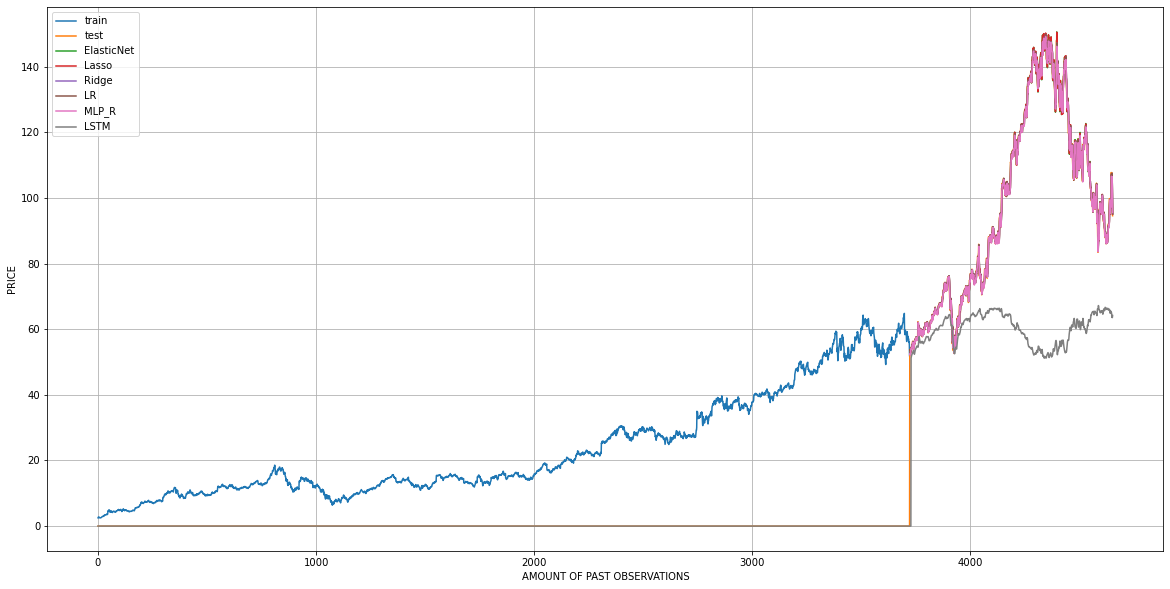

In [443]:
plt.figure(figsize=(20,10))

plt.plot(data_train.values, label = 'train')
plt.plot(data_test_chart, label = 'test')

all_data = []

for name, model in models: 
    data = np.zeros(data.shape[0], dtype=float)
    data.fill(np.nan)
    
    for i in range(1,test_data_size):
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
        
    all_data.append(data)
        
    plt.plot(data , label=name)
    
    
plt.plot(test_predict_inverted_final, label='LSTM')
plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOT TEST DATA SECTION AND PREDICTED DATA FOR ALL MODELS

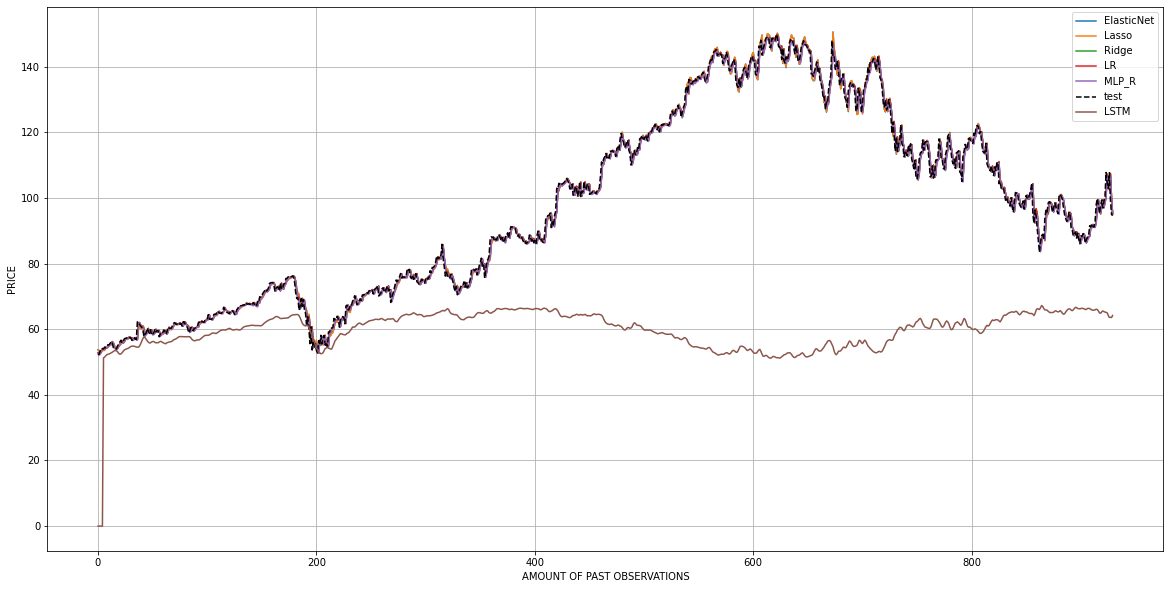

In [444]:
# NARYSOWANIE WYKRESU DLA CZĘŚCI TESTOWEJ NAUCZONYCH MODELI

plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,test_data_size):
        data_chart = data_test.values
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOTTING LAST 450 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

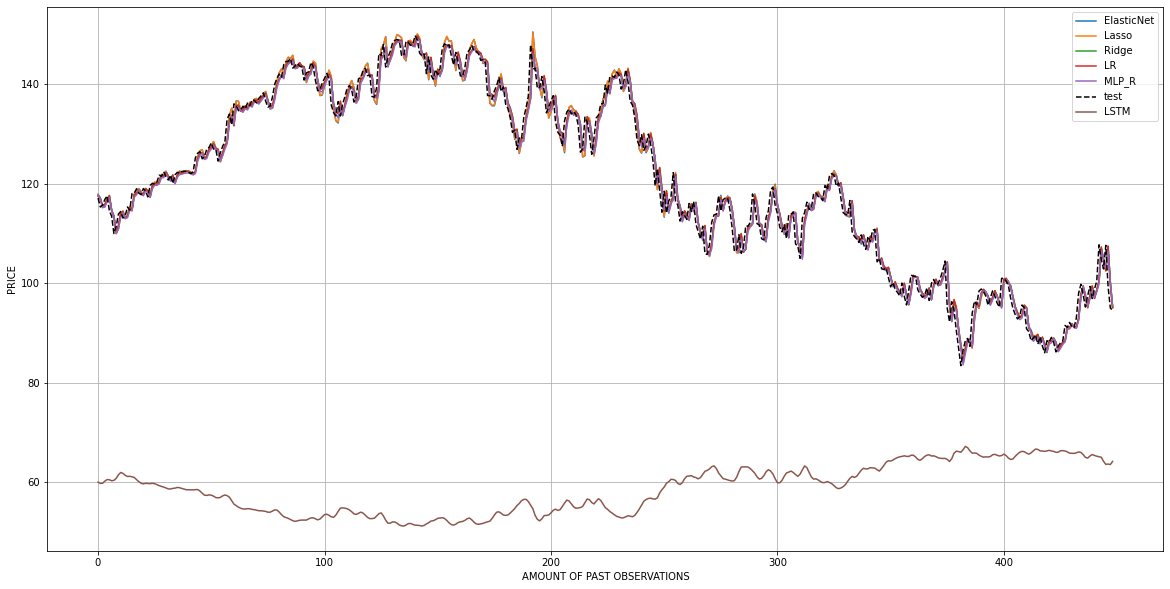

In [445]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,450):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOTTING LAST 225 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

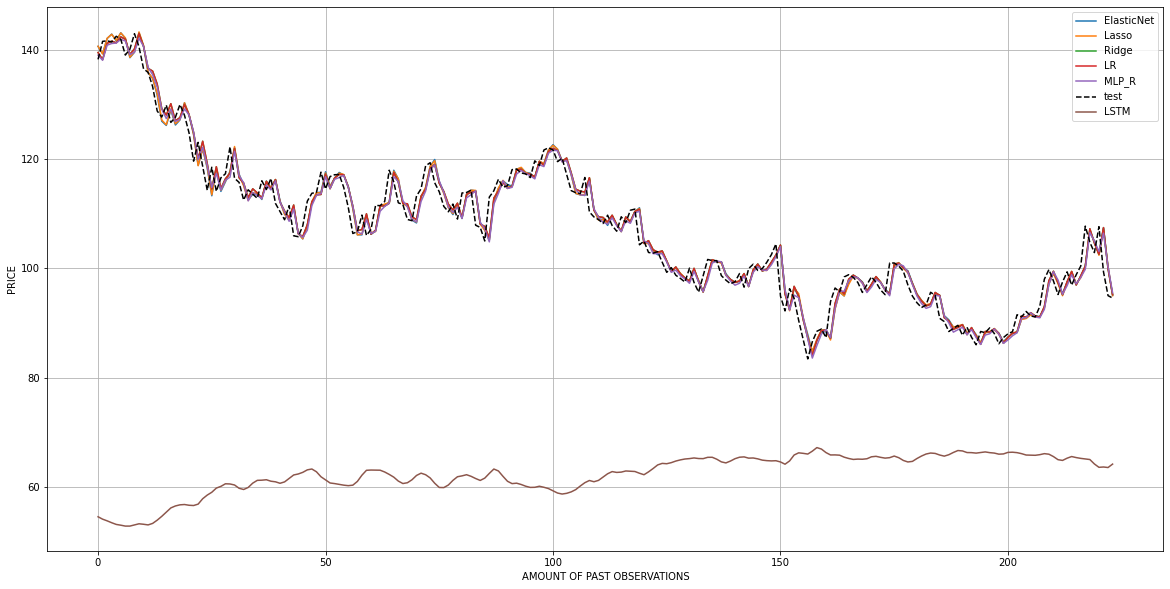

In [446]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,225):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOTTING LAST 110 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

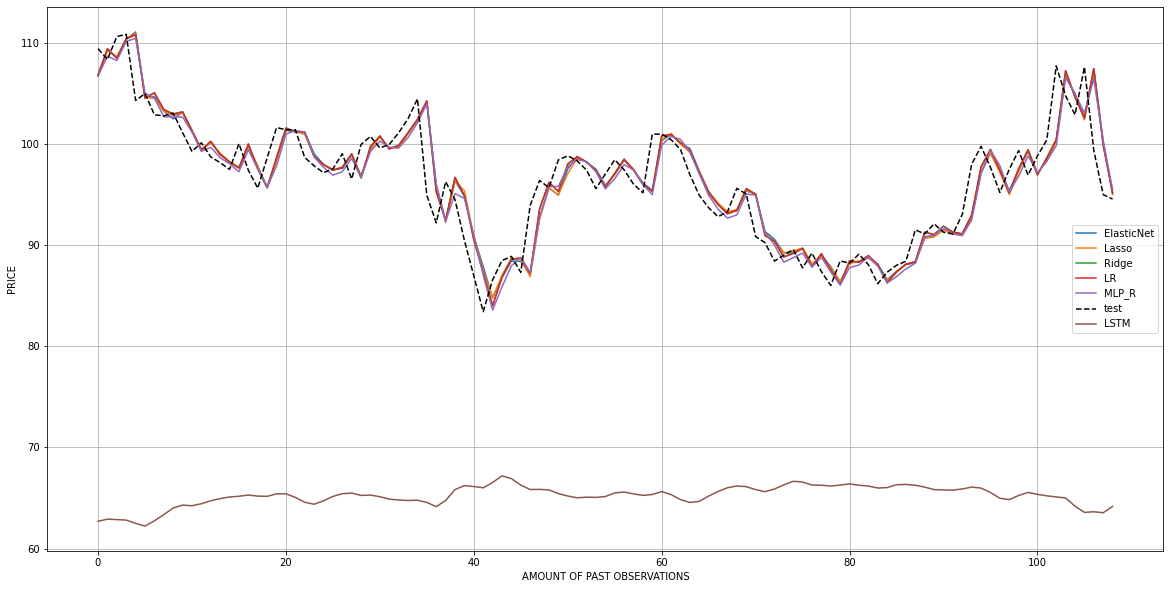

In [447]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,110):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOTTING LAST 55 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

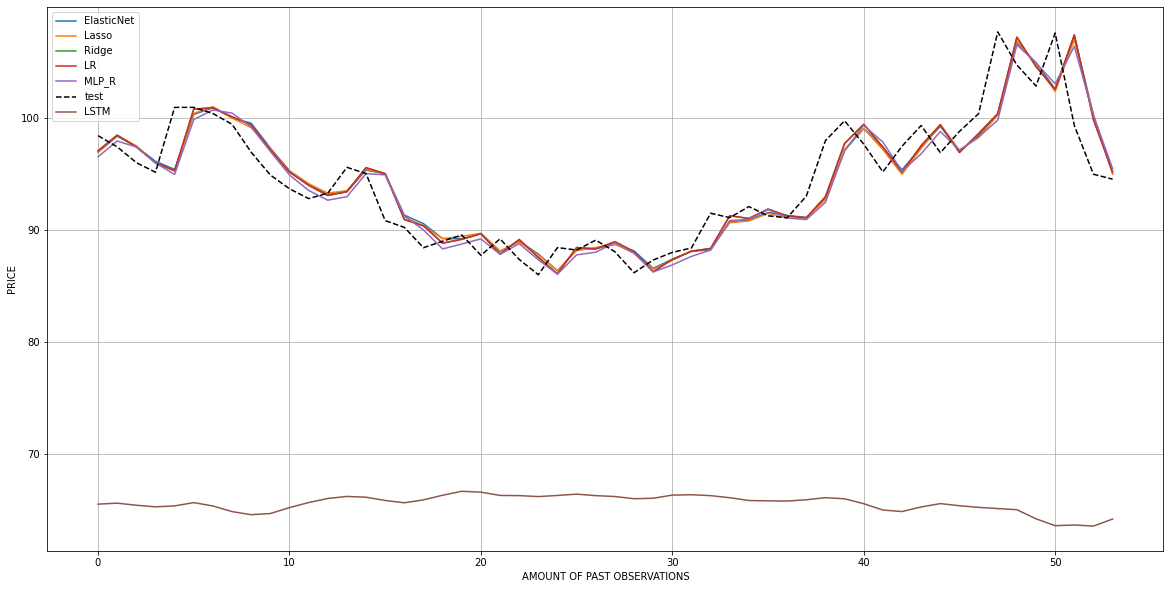

In [448]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,55):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOTTING LAST 25 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

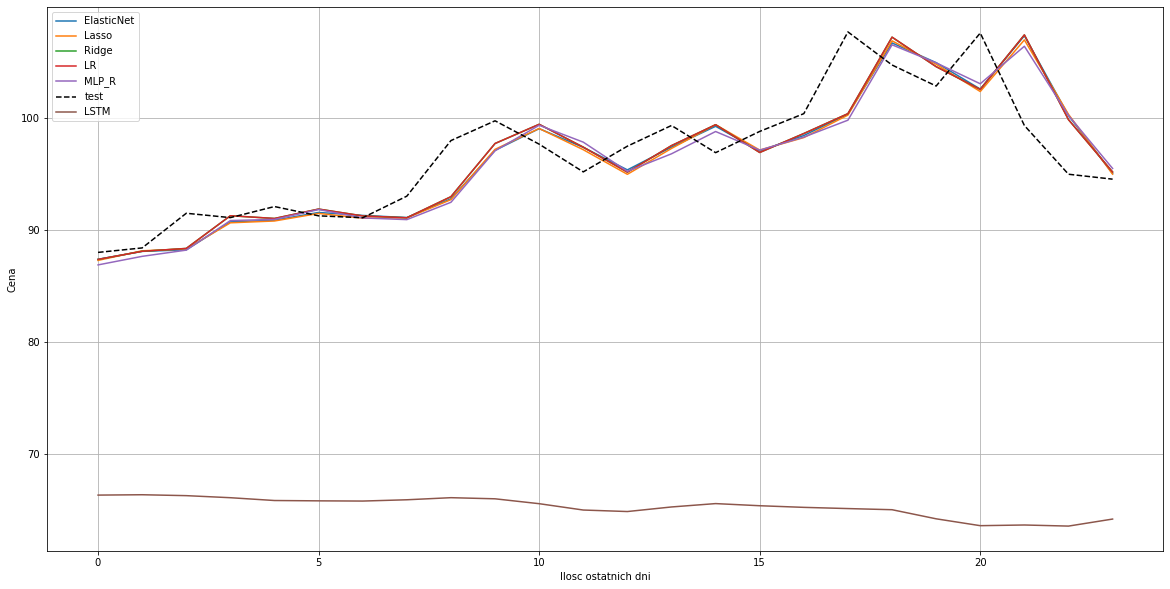

In [449]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,25):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('Ilosc ostatnich dni')
plt.ylabel('Cena')
plt.show()

#### PLOTTING LAST 12 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

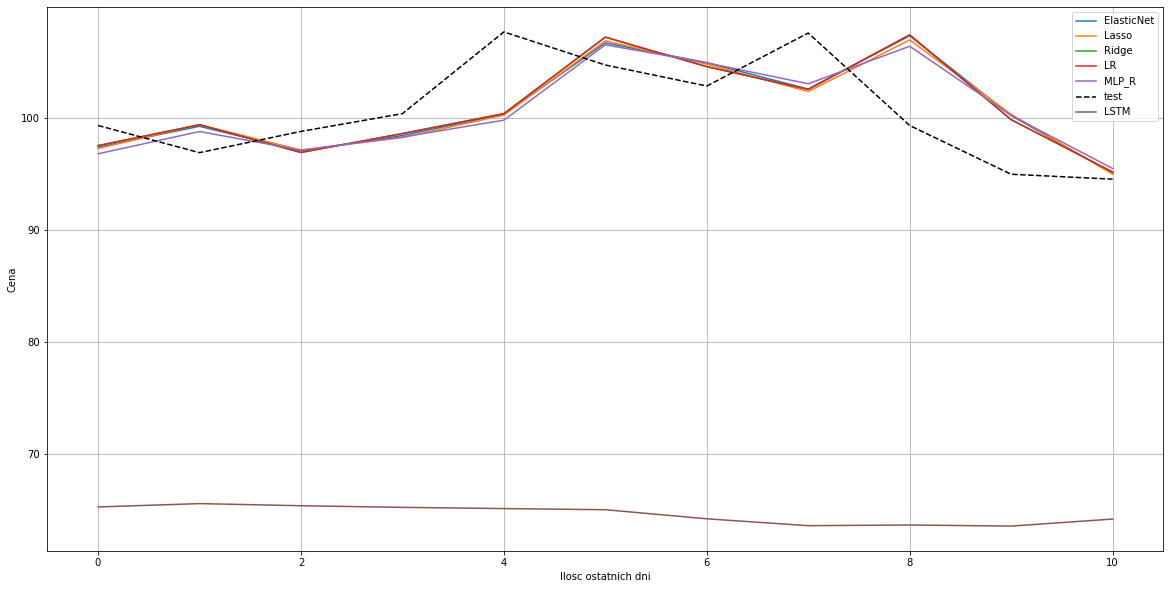

In [450]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,12):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('Ilosc ostatnich dni')
plt.ylabel('Cena')
plt.show()

#### CONCLUSION_1: DESPITE THE FACT THAT THE ANALYZED MODELS PREDICT OBSERVATIONS IN SATISFACTORY WAY FOR TEST DATA, IT IS IMPORTANT TO REMEMBER THAT THE MODEL PREDICTS VALUES BASED ON OBSERVATIONS FROM THE PAST, MODEL IS SENSITIVE TO UNEXPECTED EVENTS HAVING LOW PROBABILITY AND INTRODUCING HIGH VOLATILITY TO THE STOCK SO-CALLED "BLACK SWANS"

#### CONCLUSION_2: LSTM NEURAL NETWORK DESPITE BEING A MORE COMPLEX TOOL FOR TIME SERIES PREDICTION THAN OTHER MODELS ACHIEVES RESULTS LESS SATISFACTORY THAN SIMPLER METHODS, WHICH ADDITIONALLY COMPUTE FASTER

#### CONCLUSION_3: TO GET BETTER RESULTS - ESPECIALLY FOR THE LSTM NEURAL NETWORK MODEL ONE SHOULD INCREASE THE TIME_STEP PARAMETER WHICH DEFINES THE NUMBER OF "PAST" OBSERVATIONS ON THE BASIS WHICH WE PREDICT THE "FUTURE" OBSERVATION

#### CONCLUSION_4: SIMPLER METHODS - LINEAR REGRESSION, LASSO REGRESSION, RIDGE REGRESSION, ELASTIC_NET ACHIEVE BETTER RESULTS THAN LSTM NEURAL NETWORK

In [451]:
data = yf.download('GOOGL', index_col = 0, squeeze = True, parse_dates=['Date'])

[*********************100%***********************]  1 of 1 completed


In [452]:
data = data['Close']

In [453]:
data_values = data.values

In [454]:
data_values

array([ 2.51101089,  2.71045995,  2.73773789, ..., 99.37000275,
       95.01000214, 94.56999969])

In [455]:
data_train = data_values[:-test_data_size]

In [456]:
data_train

array([ 2.51101089,  2.71045995,  2.73773789, ..., 56.07049942,
       55.32500076, 51.93700027])

In [457]:
df = pd.DataFrame()
df['t'] = [x for x in data_train]

dataframe = series_to_supervised(df, time_step, 1)

dataframe

,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
5,2.511011,2.710460,2.737738,2.624374,2.652653,2.700450
6,2.710460,2.737738,2.624374,2.652653,2.700450,2.656406
7,2.737738,2.624374,2.652653,2.700450,2.656406,2.552803
8,2.624374,2.652653,2.700450,2.656406,2.552803,2.561812
9,2.652653,2.700450,2.656406,2.552803,2.561812,2.508759
...,...,...,...,...,...,...
3717,57.233002,57.722000,57.792500,57.266998,56.930500,56.978001
3718,57.722000,57.792500,57.266998,56.930500,56.978001,55.997002
3719,57.792500,57.266998,56.930500,56.978001,55.997002,56.070499
3720,57.266998,56.930500,56.978001,55.997002,56.070499,55.325001


In [458]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [459]:
test_predictor = X[-1:].reshape(1,-1)
training_predictor = X[-1:].tolist()[0]


predictors = []
test_list = []
test_values_real = []

for predictor in training_predictor:
    
    predictors.append(predictor)
    
print('PREDICTORS FROM TRAINING DATA: {}' .format(predictors))
         
for name, model in models:
        
    for i in range(test_data_size):
                        
        test_val= model.predict(test_predictor)
        test_val_clean = test_val.item()
    
    #print('PREDICTION FROM PREDICTORS: {}' .format(test_val_clean))
        
        test_list.append(test_val_clean)
        predictors.append(test_val_clean)
    
        del predictors[0]
    
    #print('NEW PREDICTORS TO FORM TEST DATA: {}' .format(predictors))
    
        test_predictor = np.array(predictors).reshape(1,-1)
        
    test_list_array = np.array(test_list)
    test_values_real.append(test_list_array)
        
    print('COMPUTED PREDICTIONS FOR {} TO FORM TEST DATA: {}'.format(name, test_list_array))
        
    test_list.clear()
        
    del test_predictor
        
    test_predictor = X[-1:].reshape(1,-1)

PREDICTORS FROM TRAINING DATA: [56.93050003051758, 56.97800064086914, 55.99700164794922, 56.070499420166016, 55.32500076293945]
COMPUTED PREDICTIONS FOR ElasticNet TO FORM TEST DATA: [55.95159616 56.12485582 56.12749713 56.06791497 55.98197951 56.05936797
 56.12628111 56.16611194 56.1753871  56.18004679 56.20614556 56.23886074
 56.26901848 56.2925045  56.31375981 56.33760587 56.36354445 56.38967459
 56.41469357 56.43902786 56.46356439 56.488534   56.51366871 56.53866533
 56.56350589 56.58833119 56.61322717 56.6381738  56.6631137  56.68802609
 56.71292808 56.73783975 56.7627639  56.78769172 56.81261696 56.83754051
 56.86246608 56.88739528 56.91232714 56.9372603  56.96219448 56.98713021
 57.01206794 57.03700764 57.06194907 57.08689211 57.11183682 57.13678327
 57.1617315  57.18668146 57.21163314 57.23658652 57.26154162 57.28649845
 57.31145701 57.33641728 57.36137927 57.38634297 57.41130839 57.43627553
 57.46124437 57.48621493 57.5111872  57.53616118 57.56113686 57.58611425
 57.61109335 5

COMPUTED PREDICTIONS FOR Lasso TO FORM TEST DATA: [55.88639192 62.25583681 64.21717095 67.30018827 68.55679701 65.21551754
 64.77319717 64.66604607 65.36626862 65.95399282 65.71128704 65.49071155
 65.30815135 65.34868652 65.47880719 65.51393256 65.4946193  65.44395098
 65.42153813 65.43145342 65.44393002 65.44761176 65.43920065 65.42921611
 65.42425464 65.42300093 65.42237386 65.41973    65.41557683 65.41143115
 65.40801792 65.40518599 65.4023177  65.39913949 65.39576716 65.39241717
 65.38919464 65.38604382 65.38287822 65.37966565 65.37642845 65.37320096
 65.36999357 65.36679609 65.36359582 65.36038925 65.35718087 65.35397547
 65.35077406 65.3475748  65.34437586 65.34117699 65.33797893 65.33478238
 65.3315874  65.32839365 65.3252009  65.32200914 65.3188185  65.31562906
 65.31244083 65.30925375 65.30606779 65.30288295 65.29969925 65.29651671
 65.29333532 65.29015507 65.28697596 65.28379799 65.28062116 65.27744547
 65.27427093 65.27109753 65.26792527 65.26475415 65.26158417 65.25841533
 

COMPUTED PREDICTIONS FOR MLP_R TO FORM TEST DATA: [55.26118056 58.2391663  57.57797326 56.7584293  57.28726992 56.9918276
 56.88380331 56.79616188 56.65149632 56.53804475 56.41731993 56.29569739
 56.17671282 56.05681617 55.937501   55.818539   55.69977451 55.58134961
 55.46320547 55.34534925 55.22778691 55.11051198 54.99352601 54.87682803
 54.76041703 54.64429256 54.52845381 54.41290009 54.29763071 54.18264496
 54.06794215 53.95352158 53.83938256 53.72552439 53.61194638 53.49864784
 53.38562809 53.27288644 53.16042221 53.0482347  52.93632325 52.82468717
 52.71332578 52.60223841 52.49142439 52.38088304 52.27061369 52.16061567
 52.05088831 51.94143095 51.83224293 51.72332357 51.61467223 51.50628824
 51.39817093 51.29031967 51.18273378 51.07541263 50.96835555 50.8615619
 50.75503102 50.64876228 50.54275503 50.43700862 50.33152241 50.22629577
 50.12132805 50.01661861 49.91216683 49.80797206 49.70403367 49.60035104
 49.49692354 49.39375053 49.29083139 49.18816549 49.08575222 48.98359094
 48

In [460]:
for i in test_values_real:
    
    print("R^2: {}".format(metrics.r2_score(y_test,i[:-1])))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test,i[:-1])))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test,i[:-1])))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test,i[:-1])))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test,i[:-1])))

R^2: -0.7158904854771078
Explained variance score: -0.04607351333705312
Median absolute error: 47.92116088387789
Mean squared error: 2309.1555216281354
Mean absolute errors: 43.64149595334325
R^2: -0.517970153771059
Explained variance score: 0.001357967334954746
Median absolute error: 48.433723318084695
Mean squared error: 2042.8047080595081
Mean absolute errors: 40.91702319989306
R^2: -0.6543165245985674
Explained variance score: -0.03347308538015725
Median absolute error: 46.94991572130948
Mean squared error: 2226.2925108738905
Mean absolute errors: 42.81023131116276
R^2: -0.7308091132081114
Explained variance score: -0.032825222021877876
Median absolute error: 48.7241639956263
Mean squared error: 2329.232229257051
Mean absolute errors: 43.99308512391928
R^2: -0.18426217721055416
Explained variance score: -0.10277896826552113
Median absolute error: 18.639773011595388
Mean squared error: 1593.7179958199567
Mean absolute errors: 27.787989146435073


In [461]:
r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []

for i in test_values_real:
    r2.append(metrics.r2_score(y_test, i[:-1]))
    explained_variance_score.append(metrics.explained_variance_score(y_test, i[:-1]))
    median_absolute_error.append( metrics.median_absolute_error(y_test, i[:-1]))
    mean_squared_error.append(metrics.mean_squared_error(y_test, i[:-1]))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, i[:-1]))

In [462]:
d_3 = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }

df_3 = pd.DataFrame(data=d_3)

df_3.insert(loc=0, column='Method', value=['ElasticNet_test_predicted','Lasso_test_predicted','Ridge_test_predicted', 'LR_test_predicted', 'MLP_R_test_predicted'])

df_3

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet_test_predicted,-0.715890,-0.046074,47.921161,2309.155522,43.641496
1,Lasso_test_predicted,-0.517970,0.001358,48.433723,2042.804708,40.917023
2,Ridge_test_predicted,-0.654317,-0.033473,46.949916,2226.292511,42.810231
3,LR_test_predicted,-0.730809,-0.032825,48.724164,2329.232229,43.993085
4,MLP_R_test_predicted,-0.184262,-0.102779,18.639773,1593.717996,27.787989


In [468]:
df = pd.concat([df_2, df_3, df_1])

In [469]:
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet_test_given,0.999217,0.999217,0.302067,1.053779,0.568592
1,Lasso_test_given,0.999213,0.999213,0.302724,1.059621,0.572034
2,Ridge_test_given,0.999343,0.999343,0.197421,0.884590,0.465351
3,LR_test_given,0.999343,0.999343,0.197568,0.884645,0.465337
4,MLP_R_test_given,0.999340,0.999344,0.199812,0.888736,0.470535
0,ElasticNet_test_predicted,-0.715890,-0.046074,47.921161,2309.155522,43.641496
1,Lasso_test_predicted,-0.517970,0.001358,48.433723,2042.804708,40.917023
2,Ridge_test_predicted,-0.654317,-0.033473,46.949916,2226.292511,42.810231
3,LR_test_predicted,-0.730809,-0.032825,48.724164,2329.232229,43.993085
4,MLP_R_test_predicted,-0.184262,-0.102779,18.639773,1593.717996,27.787989


In [465]:
df[df['r2'] == df['r2'].max()]

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
2,Ridge_test_given,0.999343,0.999343,0.197421,0.88459,0.465351


#### CONCLUSION_5: TO SIMULATE REALISTIC ENVIRONMENT BY ADDING PREDICTIONS TO NON-EXISTING TEST DATA, PREDICTION SCORE FOR ALL ANALYZED ML MODELS DETERIORATES

#### CONCLUSION_6: TO SIMULATE REALISTIC ENVIRONMENT BY ADDING PREDICTIONS TO NON-EXISTING TEST DATA, PREDICTION SCORE FOR ALL ANALYZED ML MODELS ARE SIMILAR TO RESULTS ACHIEVED WITH LSTM NEURAL NETWORK

#### CONCLUSION_7: STILL, AFTER CONDUCTING SIMULATIONS IN REALISTIC ENVIRONMENT TIME OF COMPUTING FOR SIMPLE ML METHODS ARE FASTER THAN LSTM NEURAL NETWORK AND RESULTS ACHIEVED ARE SIMILAR